<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.power-eng.com/content/dam/Pennenergy/online-articles/2014/11/co2-emissions.jpg" width="300px" height="100px" />

<font color = pink>

# Reducción de Gases de Efecto Invernadero: México.

<font color = purple>

## 1. Objetivos

<font color = blue>

### 1.1 Objetivo general
<font color = black> 
> - Analizar la tendencia de las emisiones de Gases de Efecto Invernadero (GEI)en México para determinar si se logrará acercar a las metas establecidas por el mismo país. 


<font color = blue> 

### 1.2 Objetivos específicos

<font color = black> 
> - Importar los datos del Banco Mundial de las emisiones de GEI en México para obtener la gráfica de los mismos, así como la cantidad de emisiones de la línea base (2000).
> - De los datos hacer el ajuste de polinomios hasta el grado que sea conveniente, para encontrar el mejor. 
> - Realizar una predicción para determinar las emisiones en 2020 y 2050 y comparar lo obtenido con las metas de reducción de la Ley General de Cambio Climático.
> - Hacer la misma comparativa con la meta de la Contribución Nacionalmente Determinada del 2015. (checar)
> - Energías renovables?


<font color = purple>

## 2. Introducción

<font color = black> 

Desde principios del siglo XX, los científicos han venido observando un cambio en el clima que no puede atribuirse únicamente a alguna de las influencias “naturales” del pasado. Este cambio en el clima, también denominado calentamiento global, ha ocurrido más rápido que cualquier otro cambio climático del que se haya tenido constancia. 
 
La causa principal del calentamiento global es el aumento de la concentración de Gases de Efecto Invernadero (GEI) en la atmósfera que se ha producido desde la Revolución Industrial, a finales del siglo XVIII. Como consecuencia del aumento de los gases que absorben y emiten radiación térmica, se retiene más calor en la atmósfera y, por consiguiente, aumenta la temperatura media global de la superficie. El aumento de la temperatura también tiene otras repercusiones sobre el sistema climático. El conjunto de estas repercusiones se denomina cambio climático antropogénico (provocado por la acción del hombre.

Los principales GEI son: 

* Dióxido de carbono (CO2)
* Metano (CH4)
* Óxido Nitroso (N2O)
* Hidrofluorocarbonos (HFC)
* Perfluorocarbonos (PFC)
* Hexafluoruro de azufre (SF6)
* Trifluoruro de nitrógeno (NF3)

Cada uno de estos gases tiene una capacidad diferente de atrapar el calor en la atmósfera, también denominado “potencial de calentamiento global” (PMC), con lo obtienes el dióxido de carbono equivalente, el cual básicamente es la conversión de PMC de otros GEI al más abundante, CO2, teniendo así una equivalencia y una unidad de medida común. 

Los siete gases mencionados anteriormente son los más importantes y que están regulados por el Protocolo de Kioto (derivado del Convención Marco de las Naciones Unidas sobre el Cambio Climático), el cual establece objetivos legalmente vinculantes para los países desarrollados a fin de que estos limiten o reduzcan sus emisiones de GEI. Fue aprobado en 1997 y entró en vigor en 2005. El vapor de agua es el gas de efecto invernadero más importante, pero, como el ser humano no produce una cantidad significativa del mismo, no tenemos control alguno sobre su concentración en la atmósfera. En consecuencia, no está regulado por el Protocolo. 

México 
-No anexo I
-LGCC
 




<font color = purple>

## 3. Desarrollo 

<font color = black> 

<font color = purple>

## 4. Simulaciones y resultados


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
from sympy import init_printing; init_printing(use_latex='mathjax')
import pyomo_utilities

In [2]:
data_file = 'Emisiones_mexico.csv'
data = pd.read_csv(data_file, header = None)

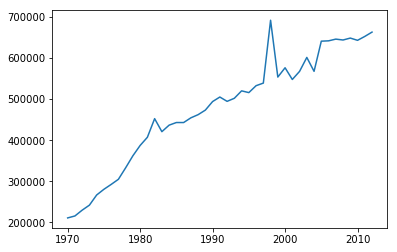

In [3]:
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

plt.figure()
plt.plot(x,y)
plt.show()

In [4]:
beta = pyomo_utilities.curve_polyfit(x, y, 25)
yhat = beta.dot(np.array([x**i for i in range(26)]))

WARNING - Loading a SolverResults object with a warning status into model=unknown; message from solver=Ipopt 3.11.1\x3a Maximum Number of Iterations Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 26
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.11.1\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 13.003777503967285
# ------------------------------------

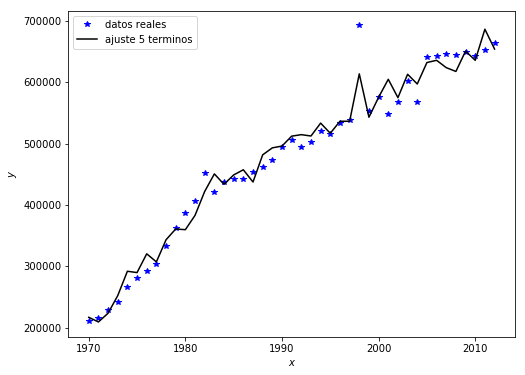

In [5]:
plt.figure(figsize = (8,6))
plt.plot(x, y, '*b', label = 'datos reales')
plt.plot(x, yhat, '-k', label = 'ajuste 5 terminos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [6]:
beta20_ridge = pyomo_utilities.curve_polyfit(x, y, 25, reg_mode = 'ridge', reg_coef = 0.1)
yhat20_ridge = np.array([x**i for i in range(26)]).T.dot(beta20_ridge)

WARNING - Loading a SolverResults object with a warning status into model=unknown; message from solver=Ipopt 3.11.1\x3a Maximum Number of Iterations Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 26
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.11.1\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 7.994436979293823
# -------------------------------------

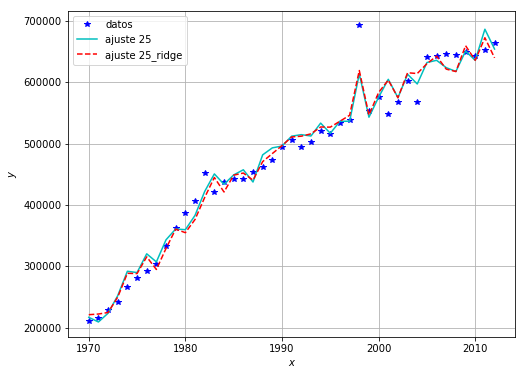

In [7]:
plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-c', label = 'ajuste 25')
plt.plot(x, yhat20_ridge, '--r', label = 'ajuste 25_ridge')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()